<a href="https://colab.research.google.com/github/vyatkinsen/Telecom-labs/blob/main/Lab1_Vyatkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Упражнение 1
  <p>Скачайте с сайта <i><a href="https://freesound.org/">https://freesound.org/</a></i> образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?</p>
<p>
  Используйте <i>high_pass, low_pass</i> и <i>band_stop</i> для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?
  </p>

Проведем импорт нужных библиотек и файлов:

In [114]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('626107__d0tdashdialup__cowbell-beat.wav'):
    !wget https://github.com/vyatkinsen/Telecom-labs/blob/main/619568__trebucheteffects__drum.wav

from thinkdsp import read_wave

Создадим объект wave из скачанного образца звука:

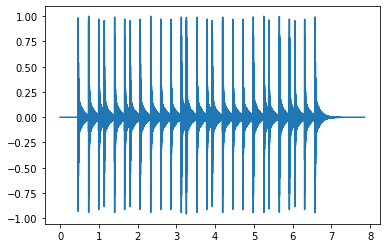

In [115]:
wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.plot()
wave.make_audio()

Выделим полусекундный сегмент, в котором высота постоянна:

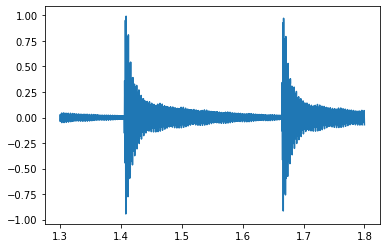

In [116]:
segment = wave.segment(1.3,0.5)
segment.plot()
segment.make_audio()

Вычислим и распечатаем спектр выделенного сегмента:



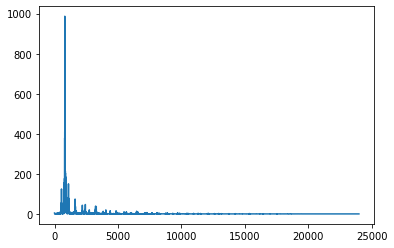

In [117]:
spectrum = segment.make_spectrum()
spectrum.plot()

Исходя из спектра, можно сделать вывод, что звук локализован примерно в первых 5 кГц. Выведем спектр этого диапазона, а затем приблизим спектрограмму до 2 кГц:




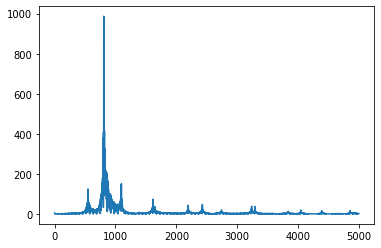

In [118]:
spectrum.plot(high = 5000)

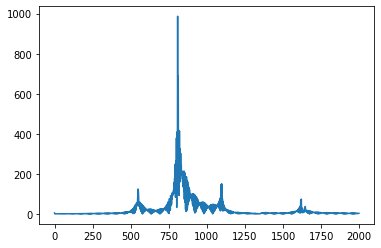

In [119]:
spectrum.plot(2000)

Выделим доминирующую частоту:

In [120]:
spectrum.peaks()[:5]

[(987.0829281907503, 808.0),
 (688.1547142612326, 812.0),
 (415.79568244281415, 816.0),
 (414.80773982377616, 820.0),
 (409.23384183086824, 804.0)]

Доминирующей частотой является 808ГЦ.

С помощью *low_pass* отфильтруем все, что выше 2 кГц:

In [121]:
spectrum.low_pass(2000)
filtered = spectrum.make_wave()

Исходный звук:

In [122]:
segment.make_audio()

Отфильтрованный звук:

In [123]:
filtered.make_audio()

Звук стал более глухим, худшего по качеству, нежели исходный. Это следствие того, что обрезанием частот изменилась форма сигнала и его тембр.

Теперь воспользуемся *high_pass* и *band_stop* для исходного выделенного сегмента и послушаем, какая мелодия получится.

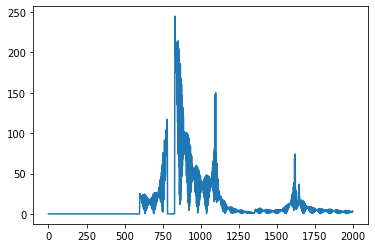

In [124]:
edited = segment.make_spectrum()
edited.high_pass(600)
edited.band_stop(780,830)
edited.plot(2000)
edited.make_wave().make_audio()

In [125]:
edited.peaks()[:5]

[(244.8929887587563, 832.0),
 (214.38994002652754, 850.0),
 (212.83042636816847, 842.0),
 (211.01706675567587, 836.0),
 (206.7808414427686, 838.0)]

Теперь мы видим, что основная частота 830 Гц

# Упражнение 2
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Соберем аккорд ля мажор

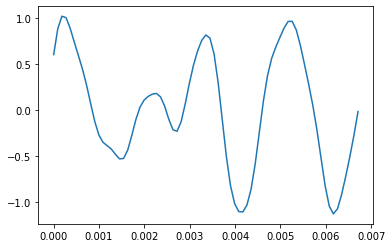

In [126]:
from thinkdsp import SinSignal, CosSignal

sin_A4 = SinSignal(freq=440.00, amp=0.7, offset=0)
sin_E5 = SinSignal(freq=659.26, amp=0.3, offset=0)
sin_A6 = SinSignal(freq=1760.00,amp=0.05, offset=0)

cos_C5 = CosSignal(freq=554.4, amp=0.4, offset=0)
cos_A5 = CosSignal(freq=880,amp=0.2, offset=0)

my_signal = sin_A4 + cos_C5 + sin_E5 + cos_A5 + sin_A6
my_signal_wave = my_signal.make_wave(duration=1)
my_signal.plot()
my_signal_wave.make_audio()

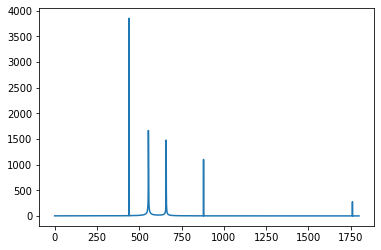

In [127]:
spectrum = my_signal_wave.make_spectrum()
spectrum.plot(high = 1800)

Добавим ноту, отличающуюся на полтона: A4#


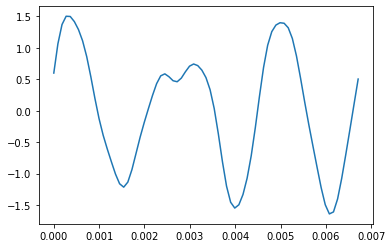

In [128]:
sin_A4_diez = SinSignal(freq=466.94,amp=0.7,offset=0)
newSignal = my_signal + sin_A4_diez
newSignal_wave = newSignal.make_wave(duration=1)
newSignal.plot()
newSignal_wave.make_audio()

Получился более нагнетающий звук.

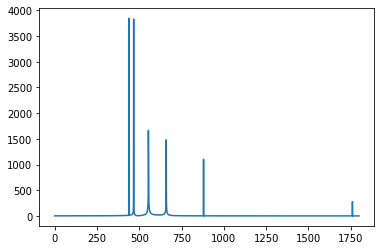

In [129]:
spectrum = newSignal_wave.make_spectrum()
spectrum.plot(high = 1800)

# Упражнение 3
Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate.

In [130]:
def stretch(wave, k):
  wave.ts /= k
  wave.framerate *= k

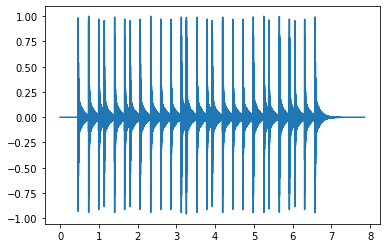

In [131]:
wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.plot()
wave.make_audio()

Замедлим нашу запись в 2 раза

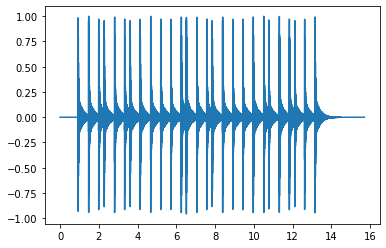

In [132]:
stretch(wave, 0.5)
wave.plot()
wave.make_audio()

Ускорим в полтора в 2 раза

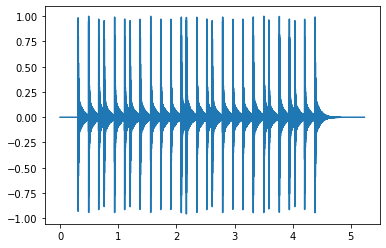

In [133]:
stretch(wave, 3)
wave.plot()
wave.make_audio()